<a href="https://colab.research.google.com/github/vigneshwarjayabal/NLP/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Understand Machine Learning Basics.
- understand Classification metrics.
- understand Text Features Extraction

- Text Classification and recognition is a very common and widely applicable use of machine learning.

# Feature extraction from the text

- Feature extraction in NLP is the process of converting text data into numerical features so that machine learning models can process it. Since ML models work with numbers, we need a way to represent words and sentences numerically.

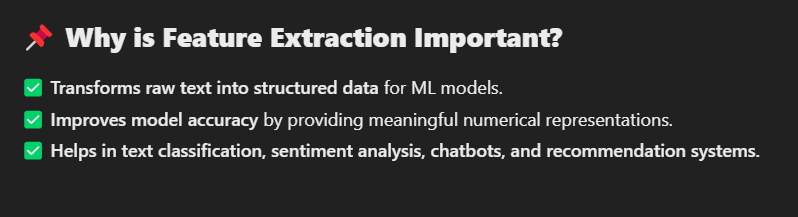


# Types of Feature extraction methods

# Bag of Words (BoW)



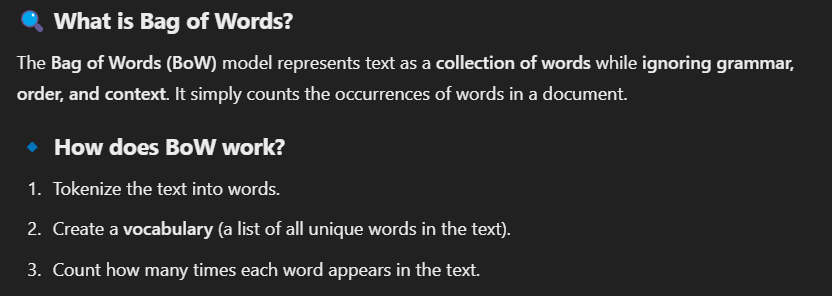

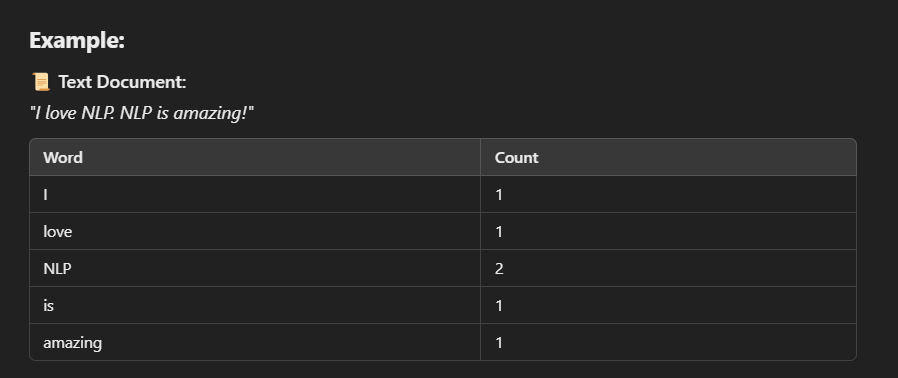

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love NLP. NLP is amazing!"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)

print("Feature Names:", vectorizer.get_feature_names_out())
print("BoW Representation:\n", X.toarray())


Feature Names: ['amazing' 'is' 'love' 'nlp']
BoW Representation:
 [[1 1 1 2]]


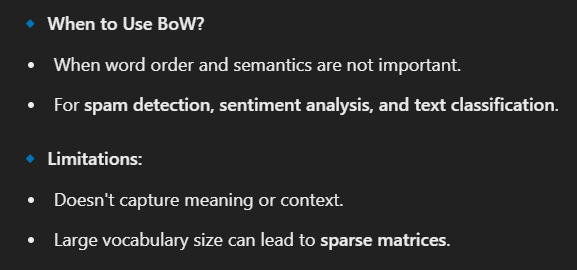

# Term Frequency - Inverse Document Frequency (TF-IDF)


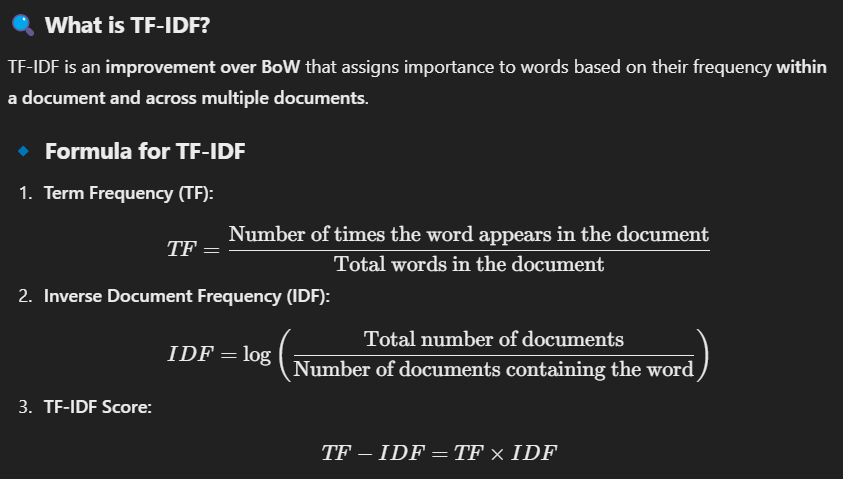

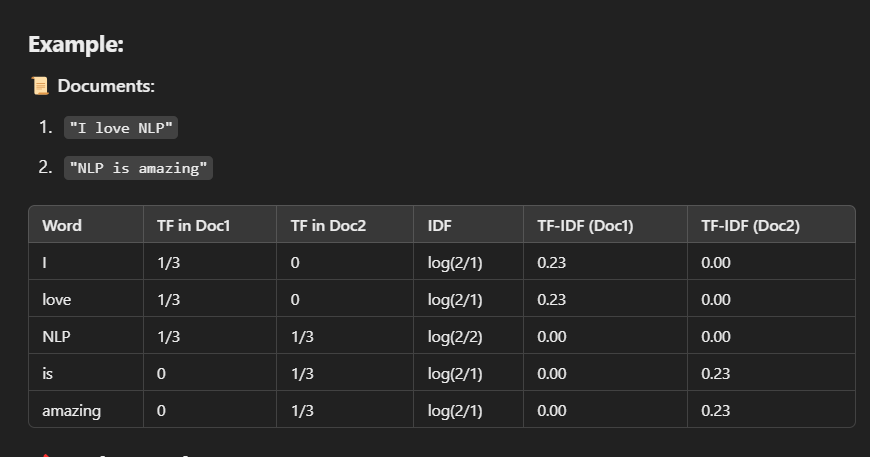

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love NLP", "NLP is amazing"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

print("Feature Names:", vectorizer.get_feature_names_out())
print("TF-IDF Representation:\n", X.toarray())


Feature Names: ['amazing' 'is' 'love' 'nlp']
TF-IDF Representation:
 [[0.         0.         0.81480247 0.57973867]
 [0.6316672  0.6316672  0.         0.44943642]]


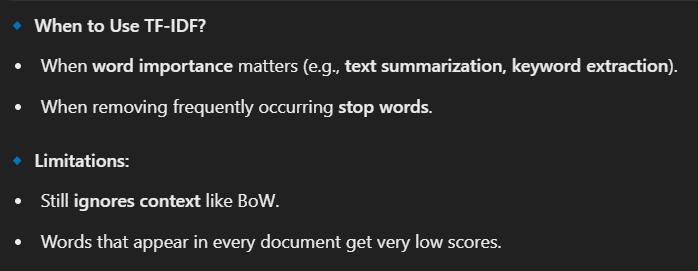

# N-Grams (Bigrams, Trigrams, etc.)

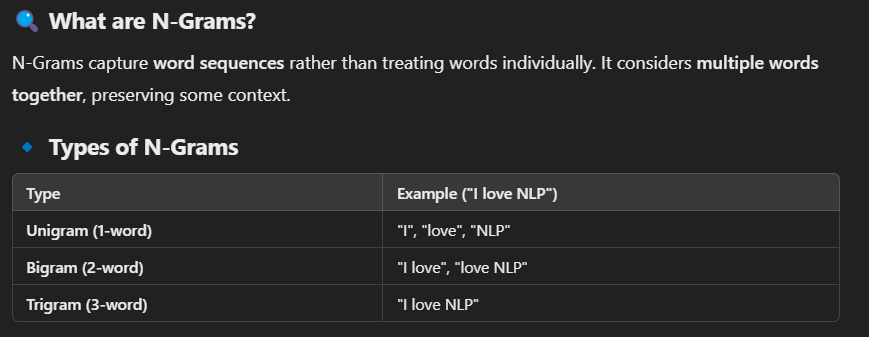

In [7]:
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Bigrams
X = vectorizer.fit_transform(["I love NLP. NLP is amazing!"])

print("Bigram Features:", vectorizer.get_feature_names_out())
print("Bigram Representation:\n", X.toarray())


Bigram Features: ['is amazing' 'love nlp' 'nlp is' 'nlp nlp']
Bigram Representation:
 [[1 1 1 1]]


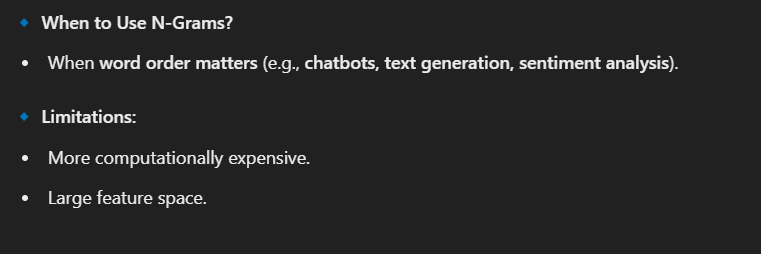

# Word Embeddings (Word2Vec, GloVe, FastText)

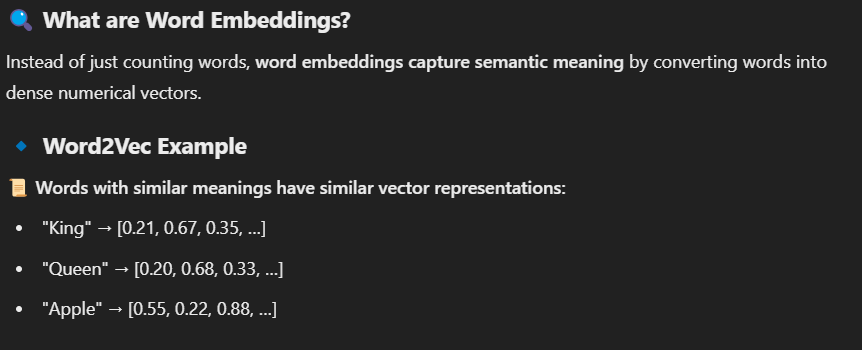

In [8]:
from gensim.models import Word2Vec

sentences = [["I", "love", "NLP"], ["NLP", "is", "amazing"]]
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1)

print("Word Vector for 'NLP':\n", model.wv["NLP"])


Word Vector for 'NLP':
 [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]


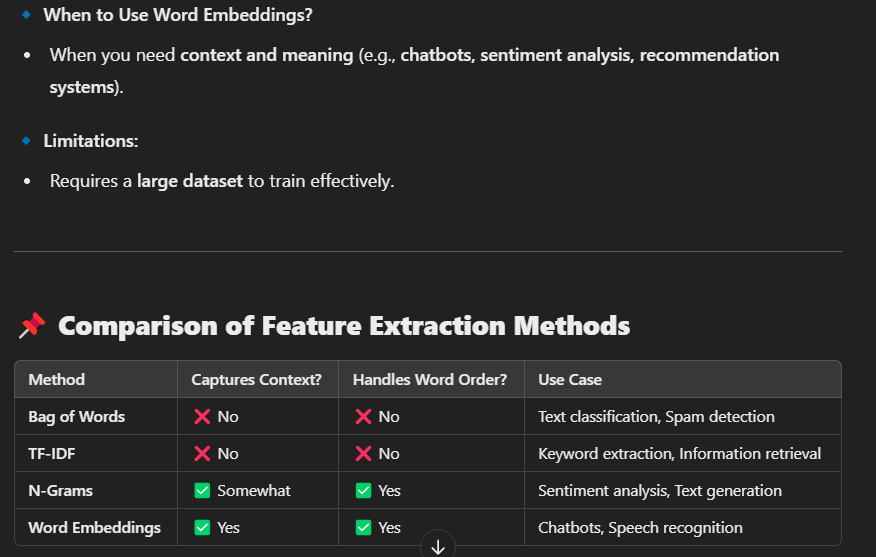

In [10]:
# Perform imports and load the dataset:
import numpy as np
import pandas as pd

df = pd.read_csv("smsspamcollection.tsv", sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [11]:
df.isnull().sum() # checking missing value

,0
label,0
message,0
length,0
punct,0


In [12]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [13]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

In [17]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [18]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [19]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [20]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [21]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [22]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037
